In [3]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

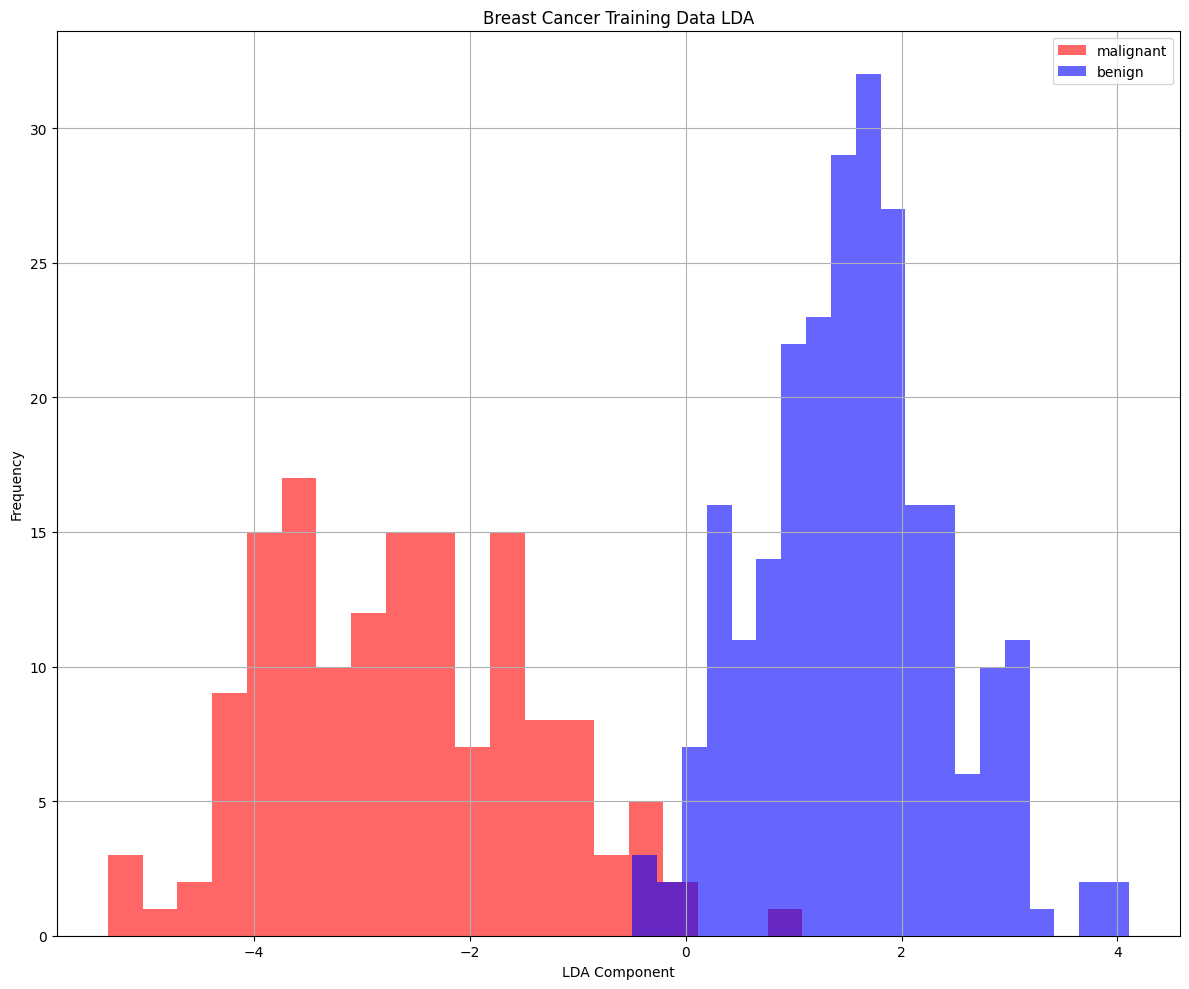

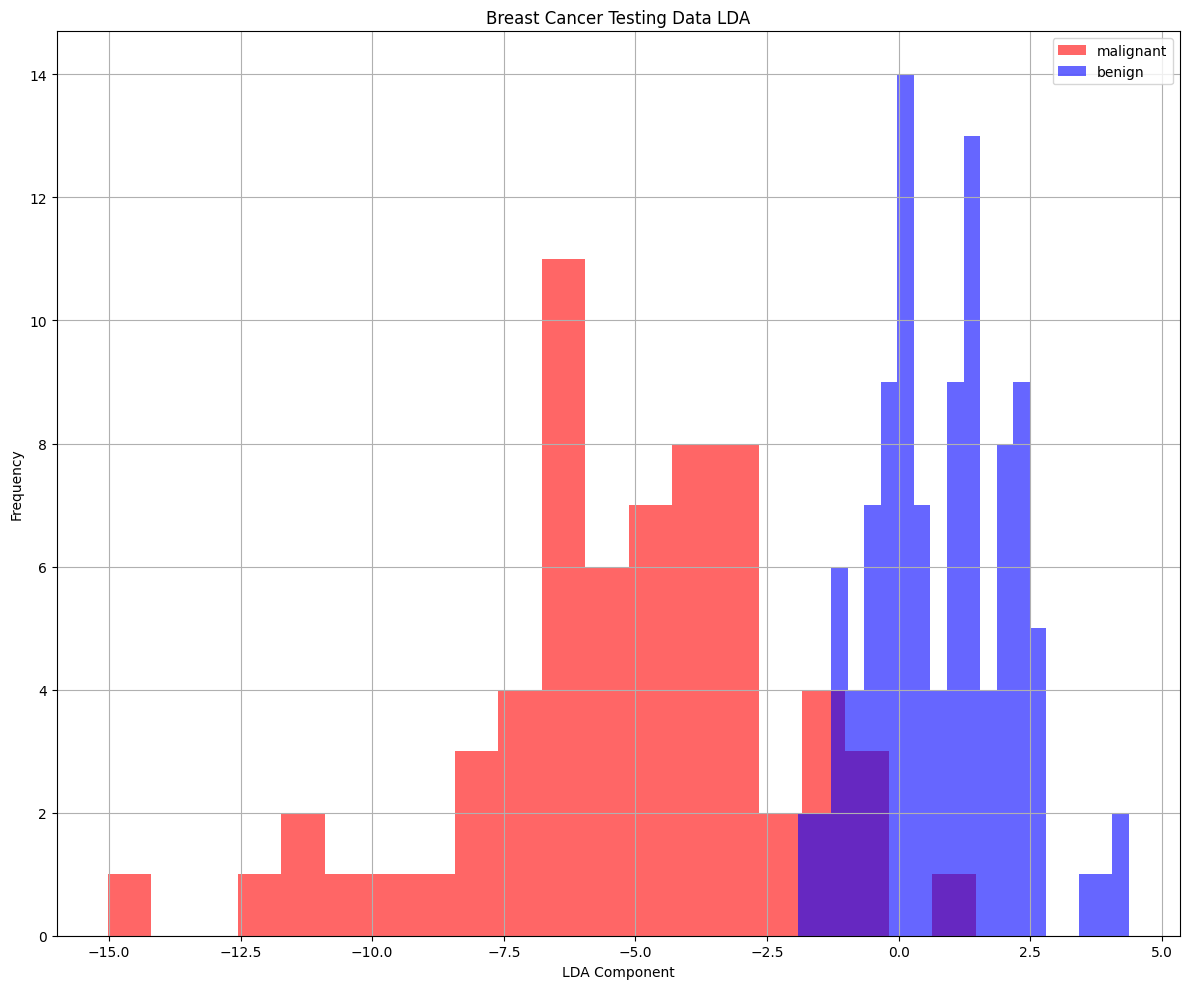

[I 2025-04-27 17:53:57,835] A new study created in memory with name: no-name-1f2c77fe-acea-4b45-9b01-b5b123619b8d
[I 2025-04-27 17:54:06,420] Trial 0 finished with value: 0.984873417721519 and parameters: {'n_estimators': 2224, 'max_depth': 4, 'learning_rate': 0.006682483120857556, 'subsample': 0.6464893932144572, 'colsample_bytree': 0.7414248179133174, 'gamma': 4.34222640907674, 'reg_alpha': 0.6593401975797116, 'reg_lambda': 0.04170155046086036}. Best is trial 0 with value: 0.984873417721519.
[I 2025-04-27 17:54:31,695] Trial 1 finished with value: 0.9899050632911391 and parameters: {'n_estimators': 7748, 'max_depth': 10, 'learning_rate': 0.06864401807469236, 'subsample': 0.8367517194086929, 'colsample_bytree': 0.8678337831475205, 'gamma': 3.000240857769611, 'reg_alpha': 5.318901215035162e-08, 'reg_lambda': 7.598694767142647e-08}. Best is trial 1 with value: 0.9899050632911391.
[I 2025-04-27 17:54:40,913] Trial 2 finished with value: 0.9873734177215189 and parameters: {'n_estimators':

Best trial:
Accuracy: 0.9899683544303798
Best hyperparameters:  {'n_estimators': 4439, 'max_depth': 7, 'learning_rate': 0.0026317711099767016, 'subsample': 0.8531981928690889, 'colsample_bytree': 0.607474133424061, 'gamma': 0.0016291585045520307, 'reg_alpha': 6.864461422399537e-07, 'reg_lambda': 1.4417458887973636e-05}


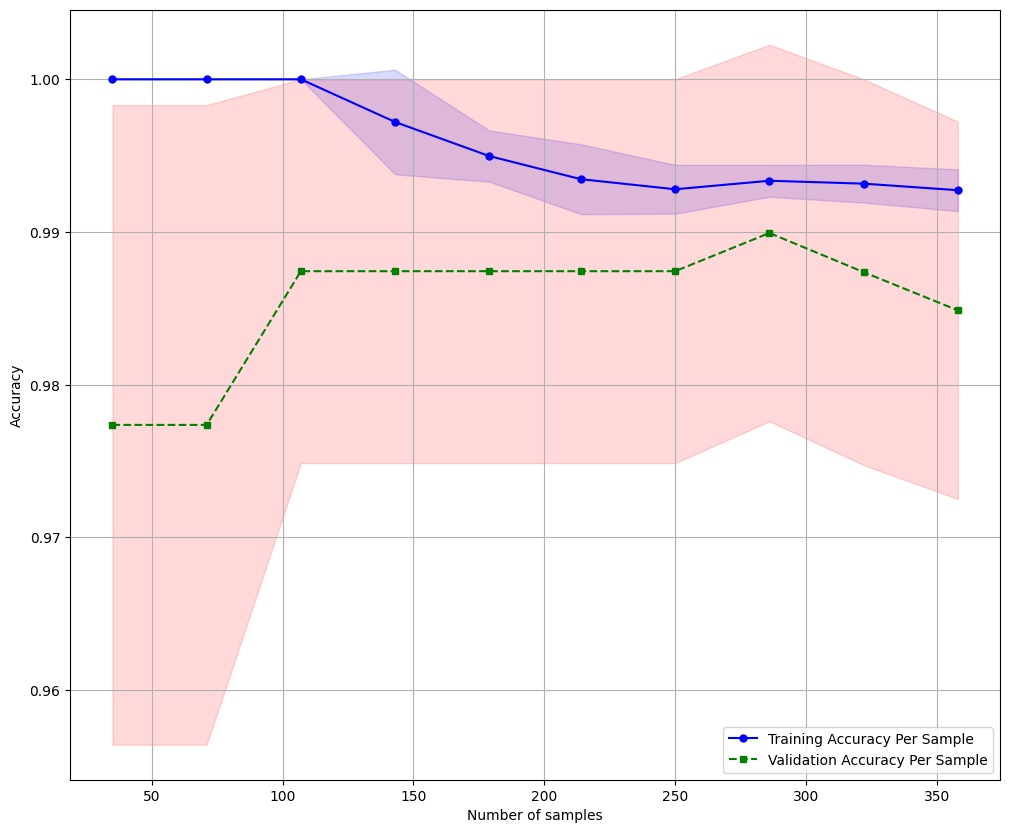

Confusion Matrix
[[62  2]
 [21 86]]
Accuracy: 0.8655, Precision: 0.9773, Recall: 0.8037, F1: 0.8821, AUC: 0.9463


In [4]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'lda', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)